<a href="https://colab.research.google.com/github/chaitanyacha/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Online Retail Customer Segmentation**  

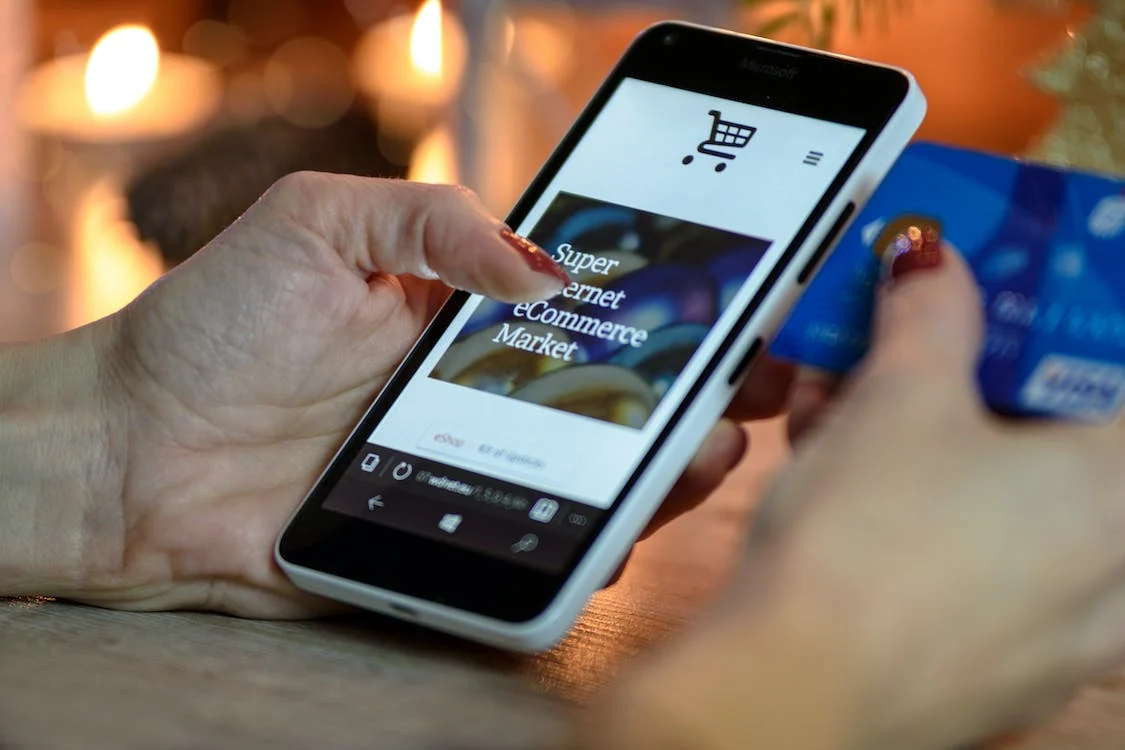

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1** - Yash Tambe 
##### **Team Member 2** - Chaitanya Chaudhary

# **Project Summary -**

**What is customer segmentation ?**

Customer segmentation is a way to split customers into groups based on certain characteristics that those customers share. All customers share the common need of your product or service, but beyond that, there are distinct demographic differences (i.e., age, gender) and they tend to have additional socio-economic, lifestyle, or other behavioral differences that can be useful to the organization.        

**Why segment customers ?**

Segmentation allows marketers to better tailor their marketing efforts to various audience subsets. Those efforts can relate to both communications and product development. 
Specifically, segmentation helps a company:
Create and communicate targeted marketing messages that will resonate with specific groups of customers, but not with others (who will receive messages tailored to their needs and interests, instead).Select the best communication channel for the segment, which might be email, social media posts, radio advertising, or another approach, depending on the segment.           
                                                             
The dataset contains 541909 records of transactional data with 8 features. The dataset had a good number of duplicated records and missing values which was dropped before moving on to the visualizations.

The main objective of analyzing this data is to predict the valuation of the customers towards the products they are purchasing like which is customers are highly valued customers and which are the less valued one.

# **GitHub Link -**

# **Problem Statement**

**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

# **Let's Begin !**

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math
from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading


In [3]:
# Load Dataset
df = pd.read_csv('/content/Online Retail.xlsx - Online Retail (1).csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f'In the given dataset,\nThe total number of rows are {df.shape[0]} and \nThe total number of columns are {df.shape[1]}')

In the given dataset,
The total number of rows are 541909 and 
The total number of columns are 8


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## **2. Understanding Your Variables**

### Variables Description 

**InvoiceNo :** Invoice number is a 6-digit number which is uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

**StockCode :** It is a product code, a nominal, a 5-digit number uniquely assigned to each distinct product.

**Description :** Product name.

**Quantity :** The quantities of each product (item) per transaction. (Numeric value)

**InvoiceDate :** Invoice Date and time, the period when the transaction is generated.

**UnitPrice :** Unit price, Product price per unit in sterling.

**CustomerID :** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

**Country :** Country name. Nominal, the name of the country where each customer resides.

## 3. **Data Wrangling**

#### Check Unique Values for each variable.

In [8]:
# Check Unique Values for each variable.
# creating an object named required_variables that will contain all 
required_variables = ['Description','Country']
for i in required_variables :
  print(f'Unique values for variable "{i}" is as below :')
  print(df[i].unique())
  print(f'\nTotal number of unique values for variable "{i}" are {df[i].nunique()}')
  print('\n')

Unique values for variable "Description" is as below :
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Total number of unique values for variable "Description" are 4223


Unique values for variable "Country" is as below :
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']

Total number of unique values for variable "Country" are 38




#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'The given dataset has total of {len(df[df.duplicated()])} duplicate rows')

The given dataset has total of 5268 duplicate rows


In [10]:
# permanently dropping the duplicate rows from the dataset
df.drop_duplicates(inplace = True)

In [11]:
# checking the duplicate rows again afer dropping them 
print(f'After dropping duplicate rows, now we have total of {len(df[df.duplicated()])} duplicate rows present in our dataset')

After dropping duplicate rows, now we have total of 0 duplicate rows present in our dataset


In [12]:
# checking the dataset shape after droping the duplicate rows
df.shape

(536641, 8)

As we can see after dropping duplicate rows our shape of dataset got reduced from 541909 rows 8 columns to 536641 rows 8 columns

#### Missing Values/Null Values

In [13]:
# Missing Values/Null Values Count
null_values = df.isna().sum()
null_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

Text(0.5, 1.0, 'Null values in dataframe')

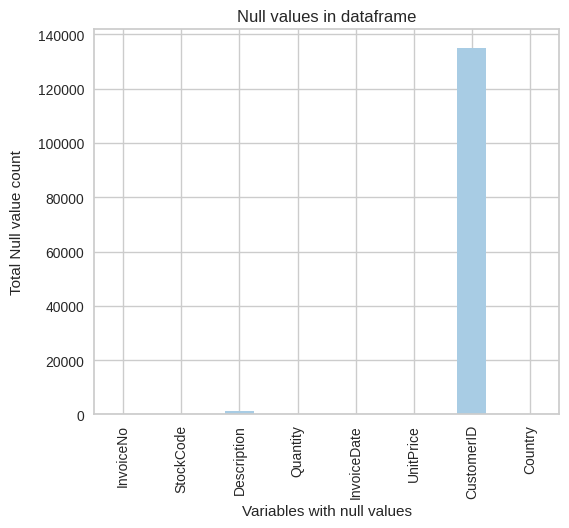

In [14]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (6,5)
null_values.plot(kind = 'bar',color = '#a8cce4')
plt.xlabel('Variables with null values')
plt.ylabel('Total Null value count',labelpad = 10)
plt.title('Null values in dataframe')

From the above plot we can conclude that the feature "CustomerID" has the maximum number of Null Values followed by feature "Description".

In [15]:
# Permanently dropping the null values 
df.dropna(inplace=True)

In [16]:
# shape of dataset after dropping the null values
df.shape

(401604, 8)

As we can see after dropping null values, the shape of dataset got reduced from 536641 rows 8 columns to 401604 rows 8 columns

In [17]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


## 4. **Exploratory Data Analysis**

#### 1. How many transactions have been canceled? What is the distribution of the canceled transactions by country and by customer?

In [19]:
# Calculating all cancelled transactions
cancelled_df = df[df['Quantity'] < 0]

# total number of cancelled transactions
print(f'Total number of cancelled transactions are {len(cancelled_df)}')
print('--'*63)

# first view of the cancelled df
cancelled_df.head()

Total number of cancelled transactions are 8872
------------------------------------------------------------------------------------------------------------------------------


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [20]:
# get the distribution of canceled transactions by customer
cancelled_by_customer = cancelled_df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
cancelled_by_customer

CustomerID
14911.0    47
17841.0    45
14606.0    35
14527.0    31
15311.0    27
           ..
14755.0     1
14760.0     1
14764.0     1
14768.0     1
18282.0     1
Name: InvoiceNo, Length: 1589, dtype: int64

Text(0.5, 0, 'CustomerID')

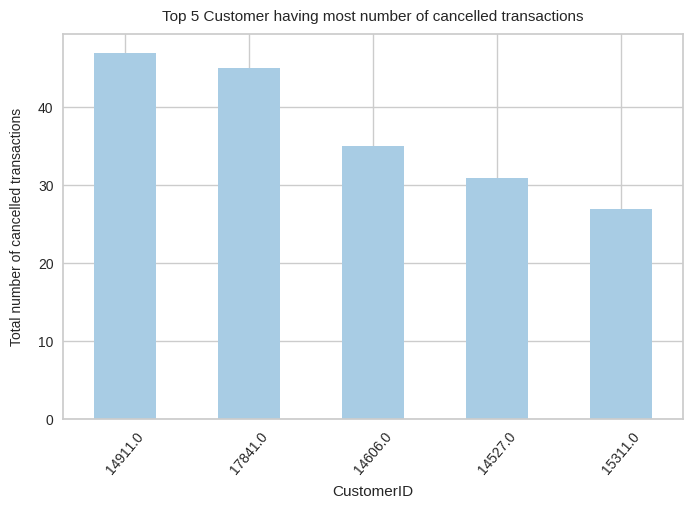

In [21]:
# visualizing the distribution of canceled transactions by customer
# visualing the top 5 customer who cancelled the order most
plt.rcParams['figure.figsize'] = (8,5)
cancelled_by_customer.head().plot(kind = 'bar',color = '#a8cce4')
plt.xticks(rotation = 50)
plt.title('Top 5 Customer having most number of cancelled transactions',pad = 10,fontsize = 11)
plt.ylabel('Total number of cancelled transactions',labelpad = 10,fontsize = 10)
plt.xlabel('CustomerID',labelpad = 6)

In [22]:
#  get the distribution of canceled transactions by country
cancelled_by_country = cancelled_df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)
cancelled_by_country

Country
United Kingdom        3208
Germany                146
France                  69
EIRE                    59
Belgium                 21
Switzerland             20
Italy                   17
Spain                   15
Portugal                13
Australia               12
Sweden                  10
Japan                    9
Finland                  7
Channel Islands          7
Netherlands              6
Malta                    5
Poland                   5
Norway                   4
Cyprus                   4
Singapore                3
Czech Republic           3
Denmark                  3
Austria                  2
USA                      2
European Community       1
Israel                   1
Saudi Arabia             1
Greece                   1
Name: InvoiceNo, dtype: int64

Text(0.5, 0, 'Country')

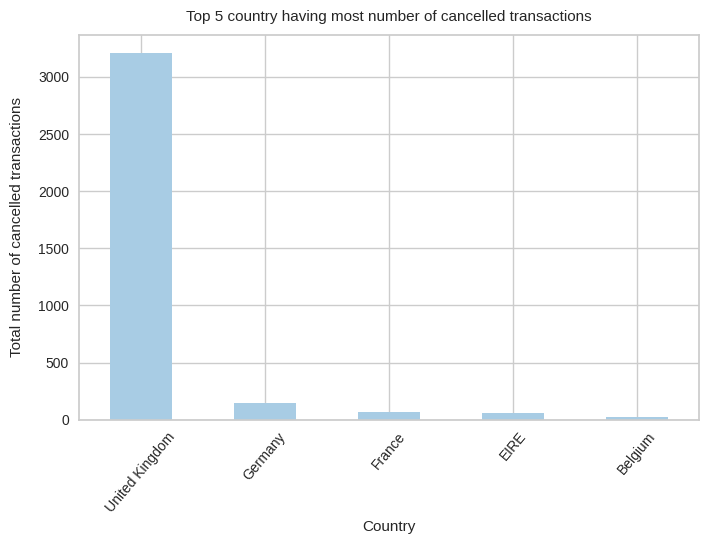

In [23]:
# visualizing the distribution of canceled transactions by country
# visualing the top 5 country having most number of cancelled transactions
plt.rcParams['figure.figsize'] = (8,5)
cancelled_by_country.head().plot(kind = 'bar',color = '#a8cce4')
plt.xticks(rotation = 50)
plt.title('Top 5 country having most number of cancelled transactions',pad = 10,fontsize = 11)
plt.ylabel('Total number of cancelled transactions',labelpad = 10)
plt.xlabel('Country')

As we checked for the quantity of the product that has been sold, we got to know some of the values in quantities of the products are less than 0 i.e. they are returned or cancelled transactions. So here we got total 8872 transactions that are cancelled in which we derived that the customers whose IDs are 14911, 17841, 14606, 14527, 15311 have cancelled the transaction most number of times respectively and also these all cancelled transactions are occured most oftenly in countries like UK, Germany, France, Ireland and Belgium respectively.

#### 2. What is the most frequently purchased product in the dataset? How many times has it been purchased?

In [24]:
# getting product quantities of each products
product_quantities = df.groupby(['StockCode', 'Description'])['Quantity'].sum()
product_quantities

StockCode  Description                
10002      INFLATABLE POLITICAL GLOBE      823
10080      GROOVY CACTUS INFLATABLE        291
10120      DOGGY RUBBER                    192
10123C     HEARTS WRAPPING TAPE              5
10124A     SPOTS ON RED BOOKCOVER TAPE      16
                                          ... 
D          Discount                      -1194
DOT        DOTCOM POSTAGE                   16
M          Manual                         2944
PADS       PADS TO MATCH ALL CUSHIONS        4
POST       POSTAGE                        3002
Name: Quantity, Length: 3916, dtype: int64

In [25]:
# getting the most frequently purchased product
most_frequently_purchased = product_quantities.sort_values(ascending = False) 
most_frequently_purchased

StockCode  Description                        
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS      53119
85099B     JUMBO BAG RED RETROSPOT                44963
84879      ASSORTED COLOUR BIRD ORNAMENT          35215
85123A     WHITE HANGING HEART T-LIGHT HOLDER     34128
21212      PACK OF 72 RETROSPOT CAKE CASES        33386
                                                  ...  
21144      PINK POODLE HANGING DECORATION           -12
CRUK       CRUK Commission                          -16
21645      ASSORTED TUTTI FRUTTI ROUND BOX          -24
D          Discount                               -1194
84347      ROTATING SILVER ANGELS T-LIGHT HLDR    -1475
Name: Quantity, Length: 3916, dtype: int64

Now we will visualize this information using bar plot for better understanding of the distribution and frequency of product sales.

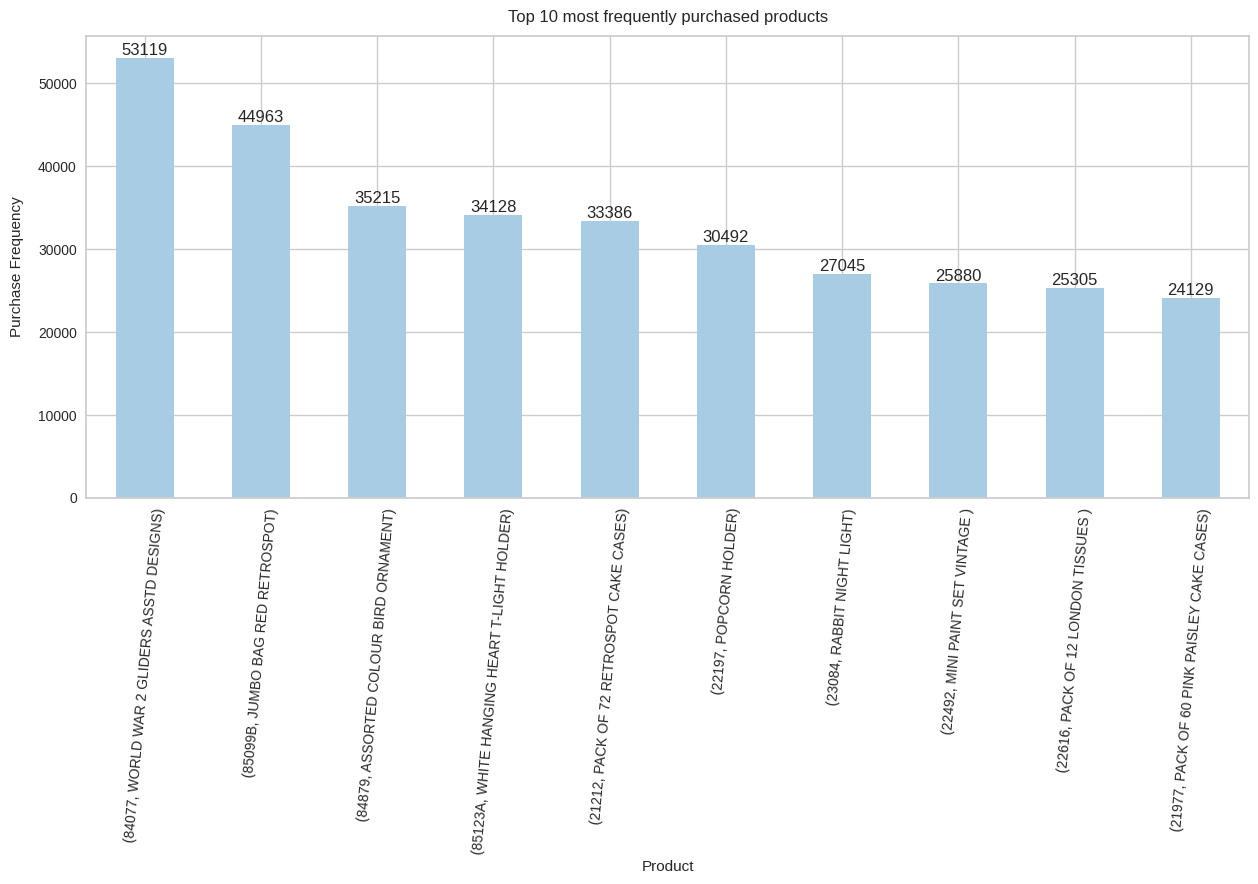

In [26]:
# visualizing the top 10 most frequently purchased products
plt.rcParams['figure.figsize'] = (15,6)
most_frequently_purchased.head(10).plot(kind = 'bar',color = '#a8cce4')
plt.xticks(rotation = 85)
plt.title('Top 10 most frequently purchased products',pad = 10)
plt.ylabel('Purchase Frequency',labelpad = 10)
plt.xlabel('Product')

# adding text on each bar
for i in range(len(most_frequently_purchased.head(10))):  # len of x axis
  # plt.text(x cordinate,y cordinate, label value , ha = '' , va = '')
  # ha = horizontal allignment | va = vertical allignment
  plt.text(i , most_frequently_purchased.head(10).iloc[i] , most_frequently_purchased.head(10).iloc[i] , ha = 'center', va = 'bottom')

During our exploratory data analysis (EDA), we investigated the frequency of product purchases and found that the most commonly purchased product was Gliders Assd Designs, which was also used in World War II. The total quantity of Gliders Assd Designs sold was 53,119 units, making it the most popular product across all sales.

#### 3. What is the Distribution of quantity of products ordered by each country ?

In [27]:
# Calculating the Distribution of quantity of products ordered by each country
orders_by_country = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
orders_by_country

Country
United Kingdom          3994870
Netherlands              200128
EIRE                     136187
Germany                  117341
France                   109806
Australia                 83643
Sweden                    35632
Switzerland               29778
Spain                     26817
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16017
Finland                   10666
Channel Islands            9473
Denmark                    8188
Italy                      7999
Cyprus                     6296
Singapore                  5234
Austria                    4827
Israel                     3987
Poland                     3653
Canada                     2763
Iceland                    2458
Unspecified                1785
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652
Czech Republic              592


As part of our exploratory data analysis, we looked at the distribution of products sold to different countries. Our analysis revealed that the United Kingdom was the largest purchaser of our products, with a total of 3,994,870 units sold. This was followed by the Netherlands, with 200,128 units sold, and Ireland, with 136,187 units sold. 

We will use bar plot to depict the sales distribution across different countries to get a better understanding of how our products are being purchased in different regions

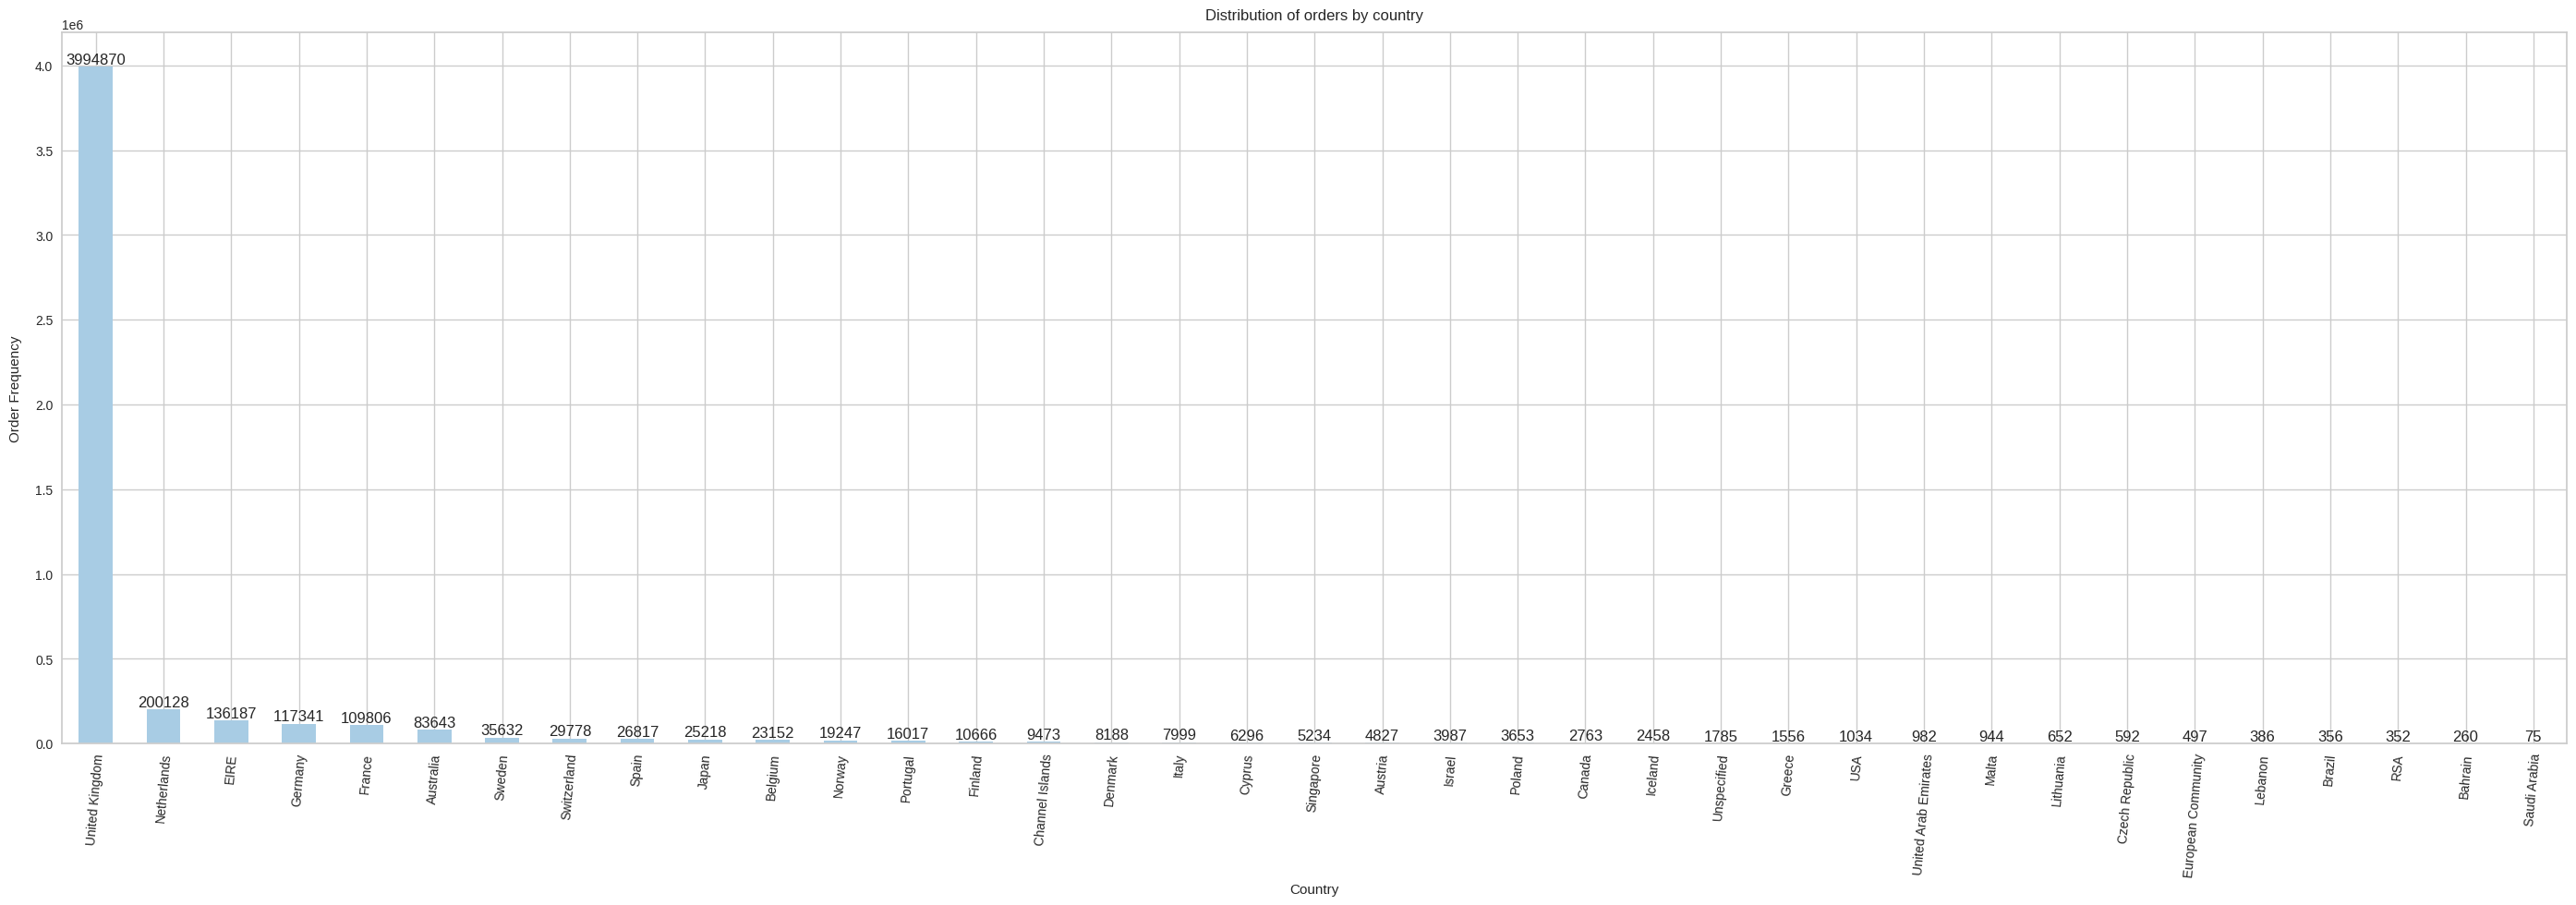

In [28]:
# visualizing the distribution of unique customers by country
plt.rcParams['figure.figsize'] = (35,10)
orders_by_country.plot(kind = 'bar',color = '#a8cce4')
plt.xticks(rotation = 85)
plt.title('Distribution of orders by country',pad = 10)
plt.ylabel('Order Frequency',labelpad = 10)
plt.xlabel('Country')

# adding corresponding values on each bar
for i in range(len(orders_by_country)):  # len of x axis
  # plt.text(x cordinate,y cordinate, label value , ha = '' , va = '')
  # ha = horizontal allignment | va = vertical allignment
  plt.text(i , orders_by_country.iloc[i] , orders_by_country.iloc[i] , ha = 'center', va = 'bottom')

#### 4. How many unique customers are in the dataset? What is the distribution of customers by country?

In [29]:
# Count the number of unique customers in the dataset
num_unique_customers = df['CustomerID'].nunique()
print('Number of unique customers:', num_unique_customers)
print('--'*20)

# Count the number of customers by country
customers_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending = False)
print('\nDistribution of customers by country:\n', customers_by_country)

Number of unique customers: 4372
----------------------------------------

Distribution of customers by country:
 Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Netherlands                9
Australia                  9
Denmark                    9
Channel Islands            9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
USA                        4
Canada                     4
Unspecified                4
Israel                     4
Greece                     4
EIRE                       3
Malta                      2
United Arab Emirates       2
Bahrain                    2
Czech Republic             1
Lithuania                  1
Lebanon 

As per our analysis , we counted the number of unique customers present in our dataset, and we found that there were 4372 unique customers who purchased our products. Further analysis revealed that the majority of our unique customers, 3950 in total, were from the United Kingdom. This indicates that the United Kingdom not only has the highest sales volume but also the highest number of individual customers. 

We will visualize this information using bar plots to better understand the distribution of customers across different countries.

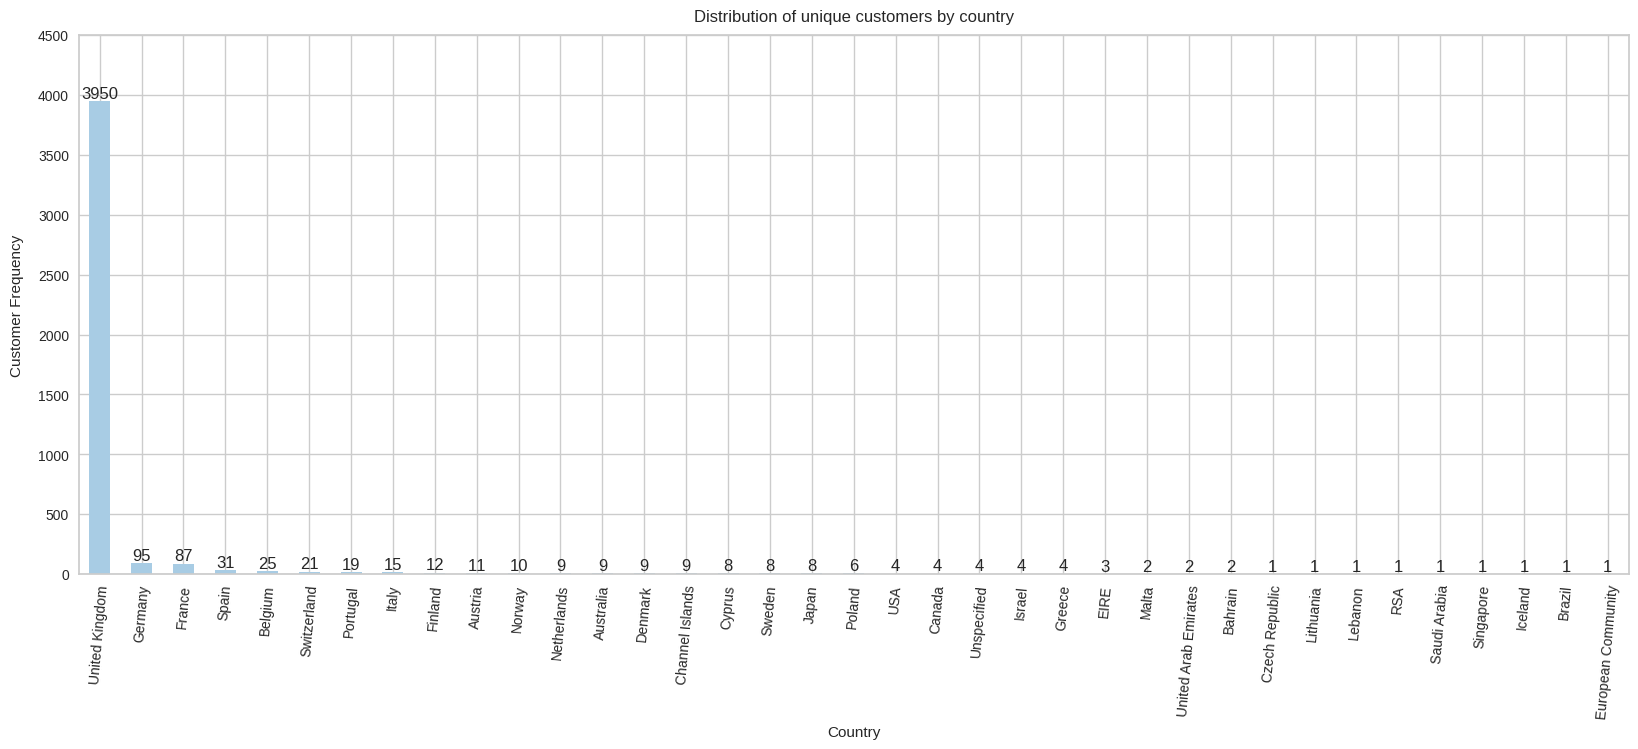

In [30]:
# visualizing the distribution of unique customers by country
plt.rcParams['figure.figsize'] = (20,7)
customers_by_country.plot(kind = 'bar',color = '#a8cce4')
plt.xticks(rotation = 85)
plt.title('Distribution of unique customers by country',pad = 10)
plt.ylabel('Customer Frequency',labelpad = 10)
plt.xlabel('Country')
plt.ylim([0,4500])  
# adding corresponding values on each bar
for i in range(len(customers_by_country)):  # len of x axis
  # plt.text(x cordinate,y cordinate, label value , ha = '' , va = '')
  # ha = horizontal allignment | va = vertical allignment
  plt.text(i , customers_by_country.iloc[i] , customers_by_country.iloc[i] , ha = 'center', va = 'bottom')

#### Checking the Distribution of the Numeric Features

In [31]:
# checking for the order cancellations
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df[df['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [32]:
# Removing the cancelled orders from the dataset
# And consider only the non cancelled orders
df = df[~df['InvoiceNo'].str.startswith('C')]

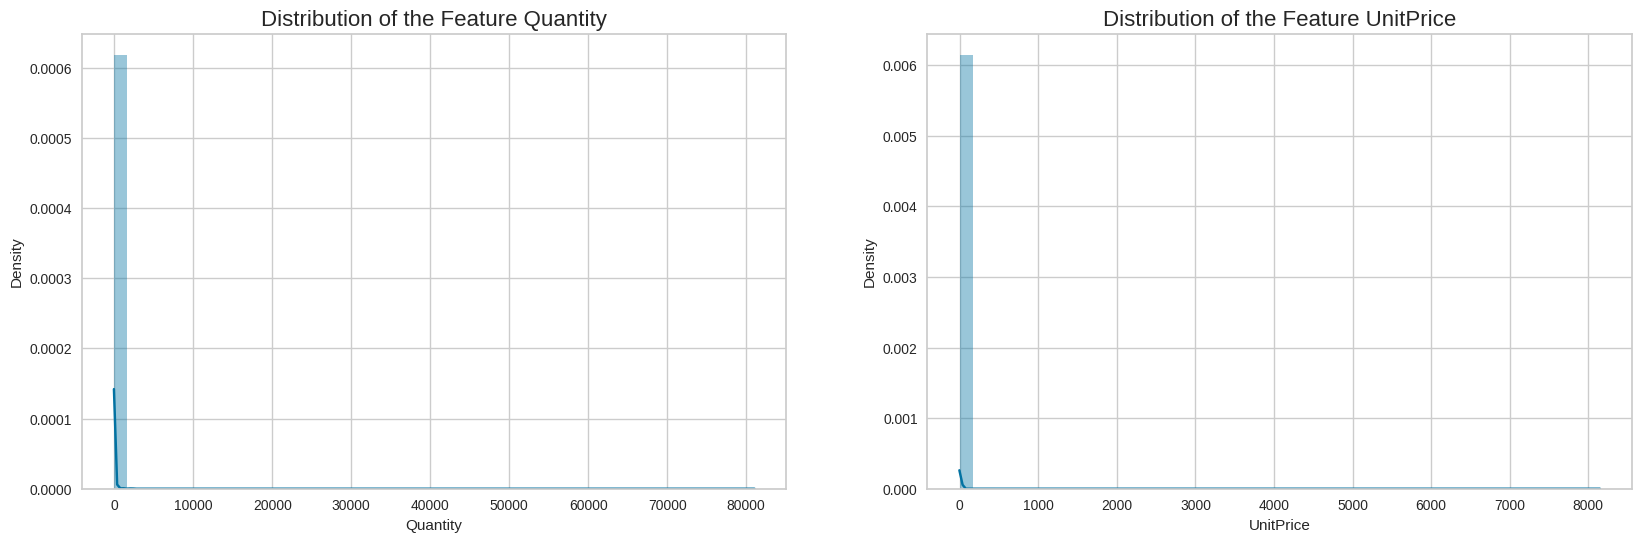

In [33]:
# Visualising the distribution of the numerical features
num_features = ['Quantity','UnitPrice']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(df[feature])
  plt.title(f"Distribution of the Feature {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

From the above plotted visualization we can see that our numeric features are highly right skewed , which means that we have a majority of feature values clustered towards the lower end of the range, with a long tail on the right side of the distribution.

Variables with right-skewness can sometimes indicate outliers or extreme values, which can affect statistical analyses and modeling. 

So we will apply logarithmic transformation on this numeric features to reduce the skewness and make the distribution more symmetrical in order to get more accurate result for our further analysis and model implementation

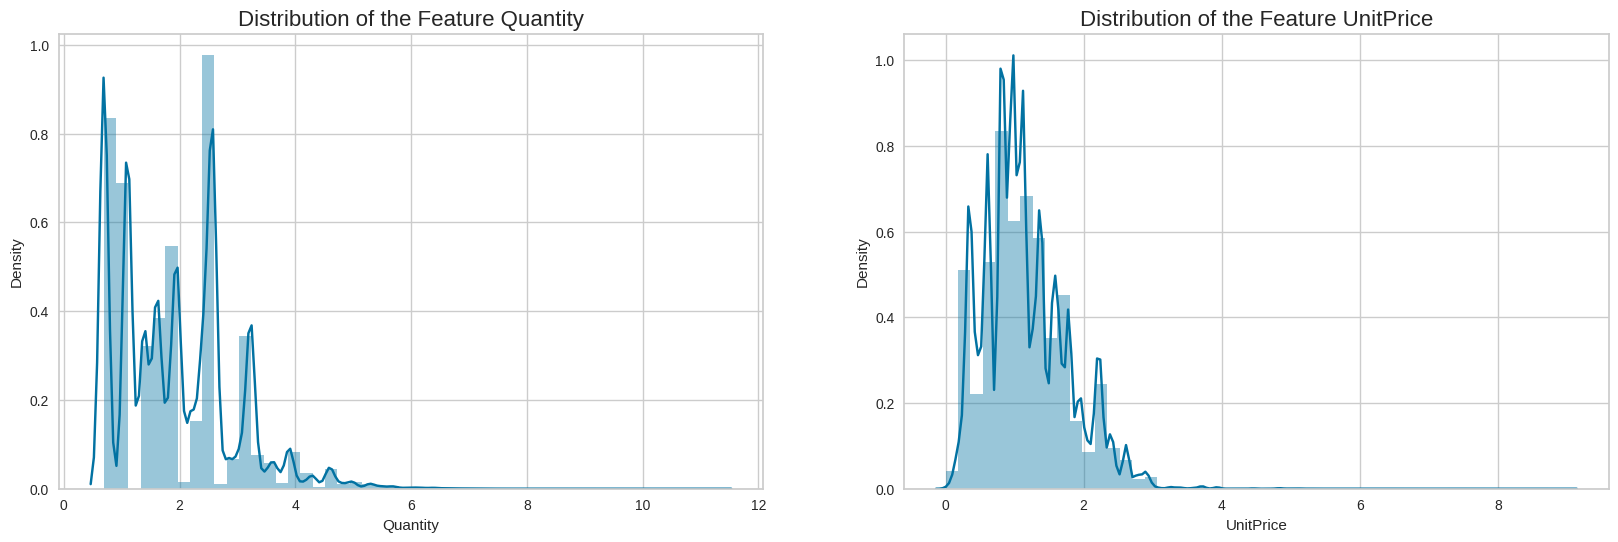

In [34]:
# Visualising the distribution of the numerical features 
num_features = ['Quantity','UnitPrice']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(df[feature]))
  plt.title(f"Distribution of the Feature {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

From the distribution plot, we can observe that applying the log10 transformation has reduced the skewness of the data and made the distribution more symmetrical. The transformed data is less spread out and the tail is less heavy, resulting in a more bell-shaped distribution. This indicates that the log10 transformation has successfully reduced the skewness and made the data more amenable to statistical analyses that assume normality. 

## **5. Feature Engineering & Data Pre-processing**

In [35]:
# Calculating TotalAmount of transaction carried out by each customer from Quantity and UnitPrice
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

#### Converting 'InvoiceDate' feature into Datetime dtype

In [36]:
# Checking the dtype of 'InvoiceDate' Feature
df['InvoiceDate'].dtype

dtype('O')

In [37]:
# convert InvoiceDate column to datetime as it is of object 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [38]:
# dtype of the Feature 'InvoiceDate' after conversion
df['InvoiceDate'].dtype

dtype('<M8[ns]')

#### Filter UK only data

Our objective is to segment the major customer groups in a transactional dataset for a non-store online retail registered in the UK. The dataset contains all transactions between 01/12/2010 and 09/12/2011, and we will only focus on the data from this country for further analysis.

In [39]:
# filtering UK data only
df = df[df['Country'] == 'United Kingdom']

# checking the shape of the dataset
df.shape

(349227, 9)

## **6. Calculating RFM Scores**

**RFM** (**Recency**, **Frequency**, **Monetary**) score is a widely used customer segmentation technique that is based on three key factors:

**Recency:** Refers to how recently a customer has made a purchase. This is an important factor as recent customers are more likely to make repeat purchases compared to those who haven't purchased in a long time.

**Frequency:** Refers to how often a customer makes purchases. This helps to identify customers who are more loyal and engaged with the business.

**Monetary:** Refers to how much a customer spends on each purchase. This helps to identify customers who are more valuable to the business in terms of revenue.

The RFM score is calculated by assigning a numerical value to each of these three factors for each customer and then combining them into a single score. For example, a customer who made a purchase very recently, makes frequent purchases, and spends a large amount of money each time would have a high RFM score.

In [40]:
# calculating RFM scores
# setting the latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [41]:
# descriptive stats of the rfm dataframe
rfm_df.describe()

,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,89.065800,1857.950687
std,99.528532,214.022733,7477.736186
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,298.110000
50%,50.000000,40.000000,644.300000
75%,142.000000,98.000000,1570.810000
max,373.000000,7676.000000,259657.300000


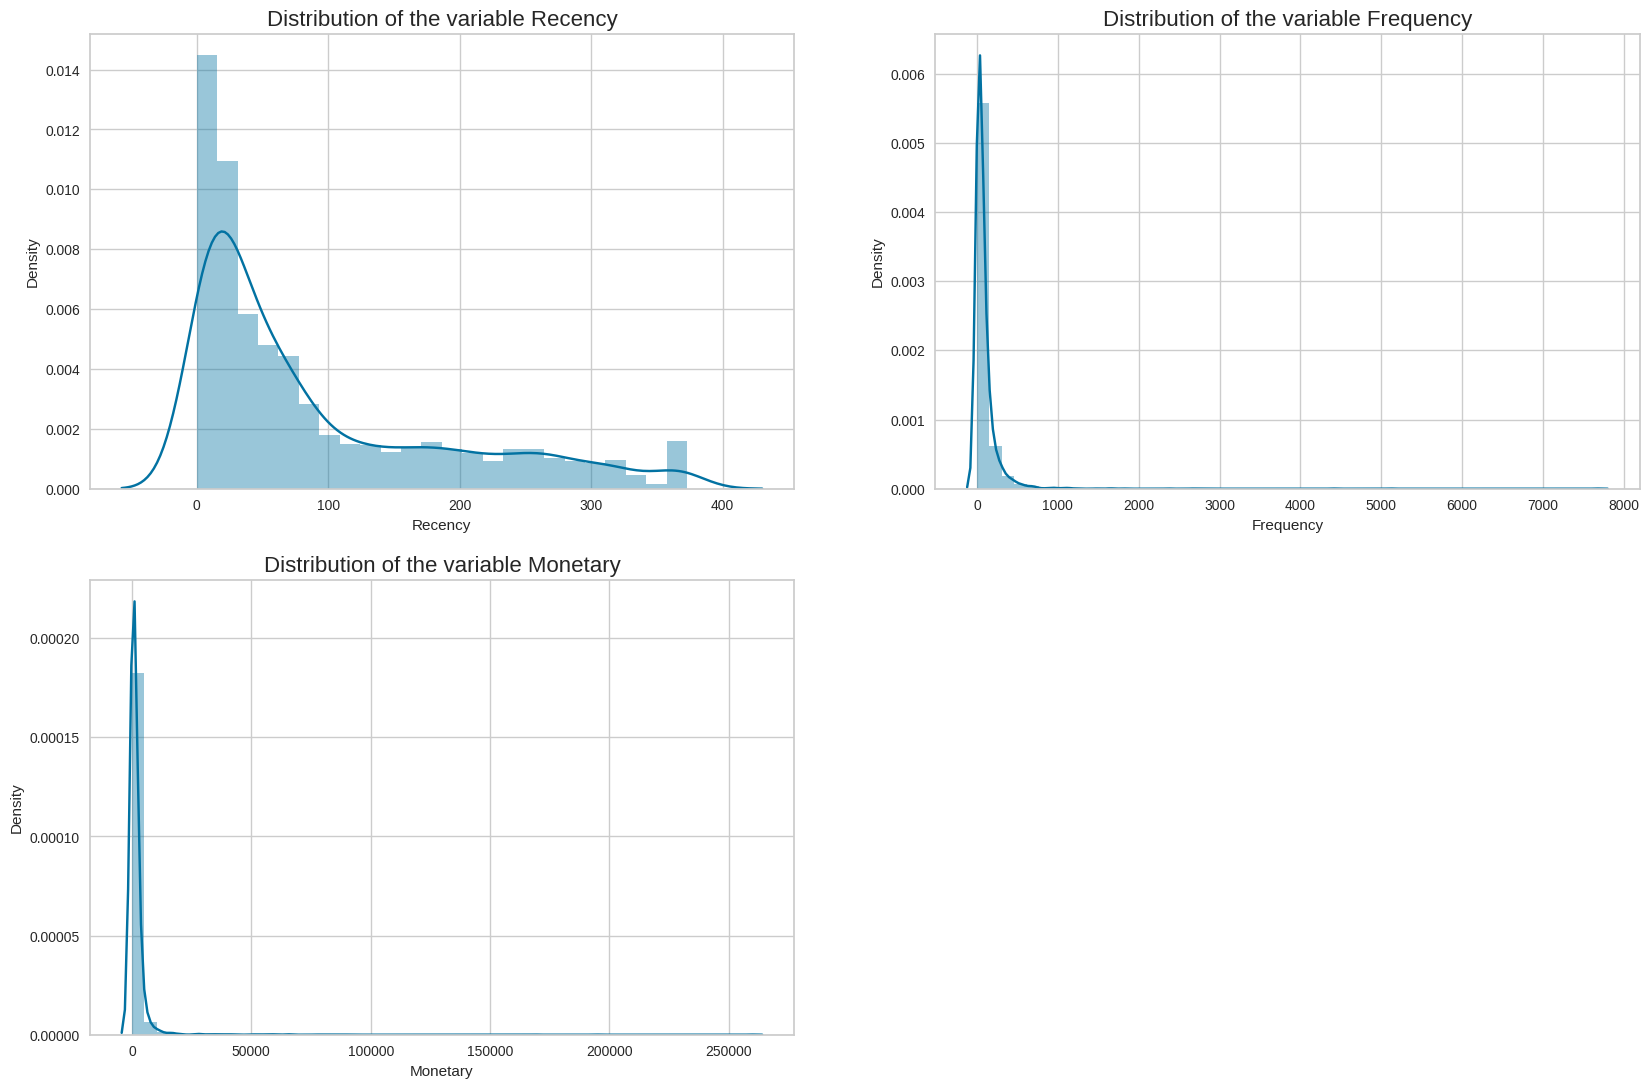

In [42]:
# Visualising the distribution of the RFM values
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_df:
  plt.subplot(2,2,count)
  sns.distplot(rfm_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

We can conclude from the above distribution plot that the **'Recency'**,**'Frequency'**,**'Monetary'** are highly right skewed , which means that we have a majority of values clustered towards the lower end of the range, with a long tail on the right side of the distribution. 

Applying logarithmic transformation on the **'Recency'**, **'Frequency'**, **'Monetary'** features to reduce the skewness and make the distribution more symmetrical in order to get more accurate result for our further analysis and model implementation

In [43]:
# applying log transfomation to RFM dataframe
rfm_log = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log1p, axis=1).round(3)

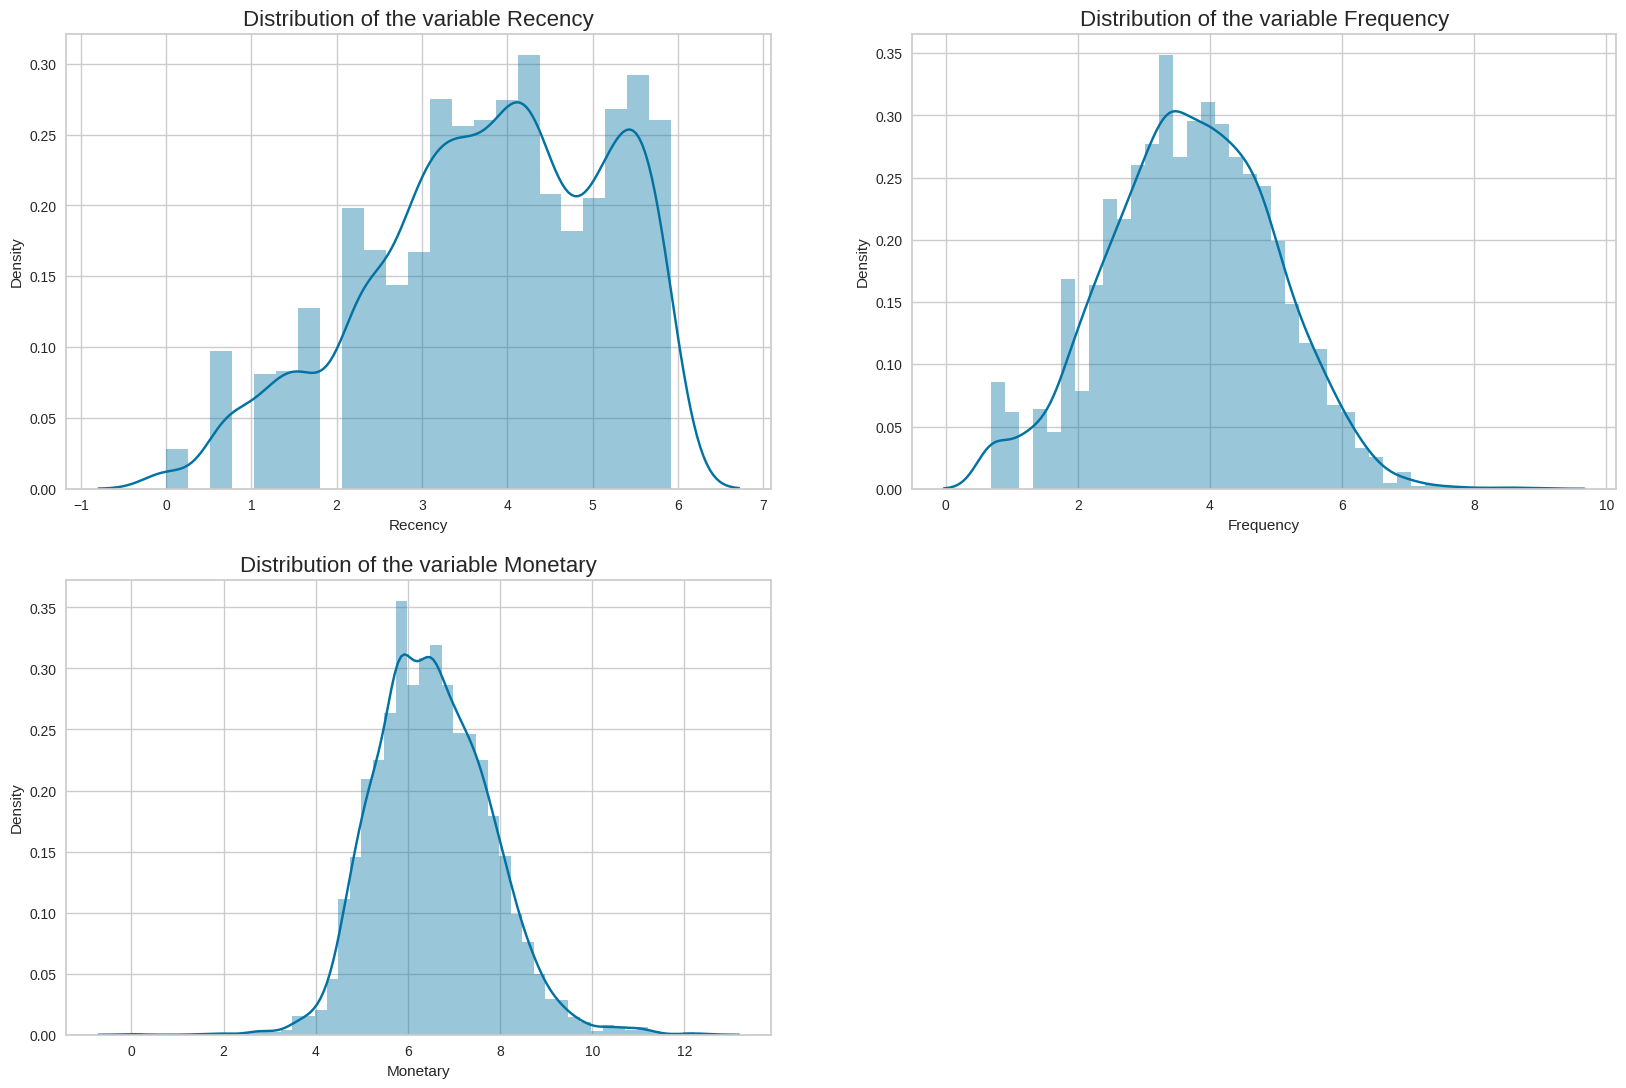

In [44]:
# Visualizing the log transformed distribution
count = 1
plt.subplots(figsize=(20,13))
for feature in rfm_log:
  plt.subplot(2,2,count)
  sns.distplot(rfm_log[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

We can see from the distribution plot that using the log10 transformation has reduced the skewness of the data and increased the symmetry of the distribution. A more bell-shaped distribution is produced by the modified data, which are less dispersed and have a lighter tail. This shows that the skewness was successfully decreased by the log10 transformation, which improved the data's suitability for statistical tests that presume normality.

In [45]:
# split the rfm values into four quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.11, 0.5: 644.3, 0.75: 1570.81}}

In [46]:
# function to create R, F, M segments
def RScore(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4

def FnMScore(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [47]:
# calculate RFM segment values for each record
rfm_df['R'] = rfm_df['Recency'].apply(RScore, args=('Recency', quantiles, ))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScore, args=('Frequency', quantiles, ))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScore, args=('Monetary', quantiles, ))
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4413,33053.19,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [48]:
# add RFM group column
rfm_df['RFMGroup'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

# calculate RFM score from RFM group column
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis=1)
rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4413,33053.19,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


we have given R , F , M score to each customer ID on the scale of 1 to 4 , and the Higher RFM score tells us that the customer is more engaged with the business and is more likely to be a valuable and loyal customer.

So customers having R , F , M values of 444,443,442,244,344... etc will have high RFM score of 12,11,10,10,11...etc suggesting us that the customer is more invested in the company and is more likely to remain a valuable and devoted customer.

## **7. Implementing K means Clustering**

The **k-means** algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

*  The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
*   Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model.

**Implementing Silhouette Score Method to find optimal number of clusters for K-means**

The **Silhouette score** measures the similarity of each data point to its own cluster compared to other clusters, and provides a way to evaluate the performance of a K-means algorithm. By comparing the Silhouette scores for different numbers of clusters, the optimal number of clusters can be determined for a given dataset.

In [49]:
# Applying silhouette score method to find the best number of clusters 'k'
from yellowbrick.cluster import SilhouetteVisualizer
features = ['Recency', 'Monetary']

# scaling our data
X_features = rfm_log[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

# create an function to implement kmeans clustering with silhouette analysis
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters = n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds)
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.4212861927004012


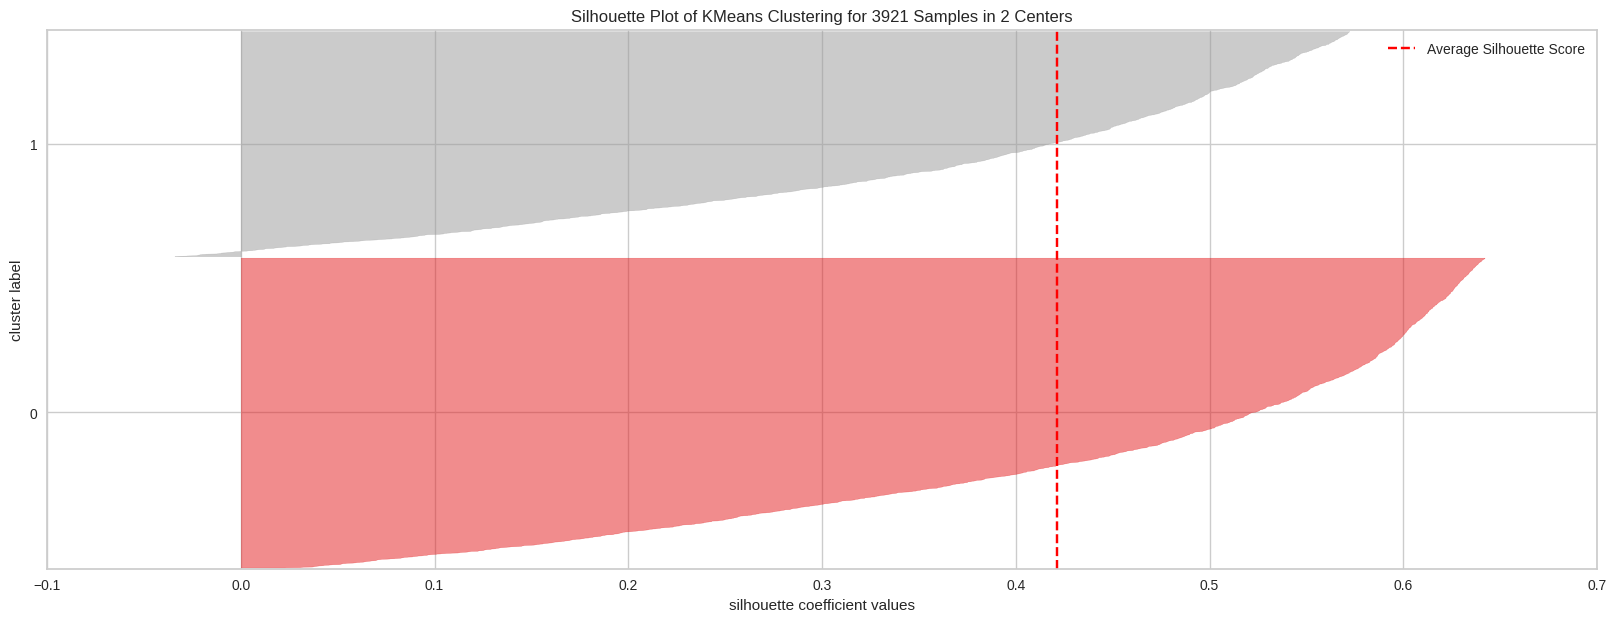

For n_clusters = 3, silhouette score is 0.3434187600111932


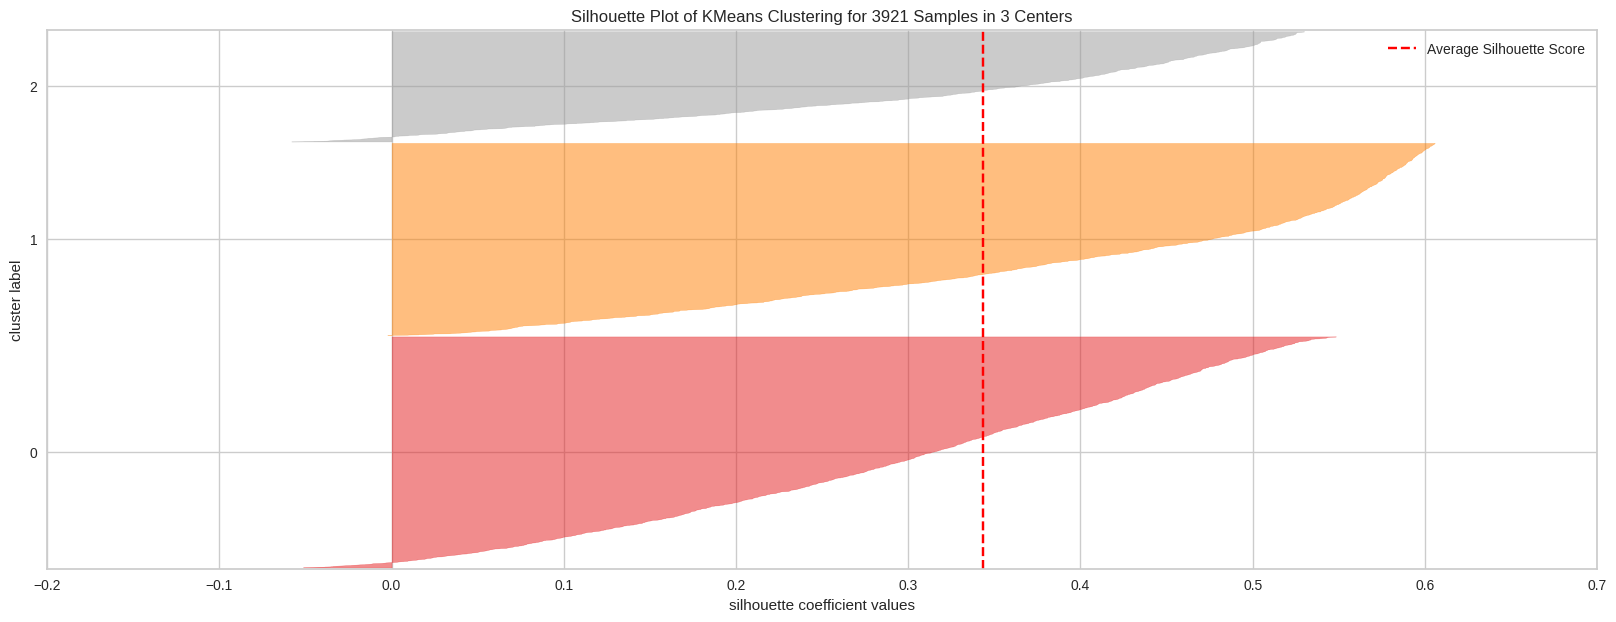

For n_clusters = 4, silhouette score is 0.36557537812659074


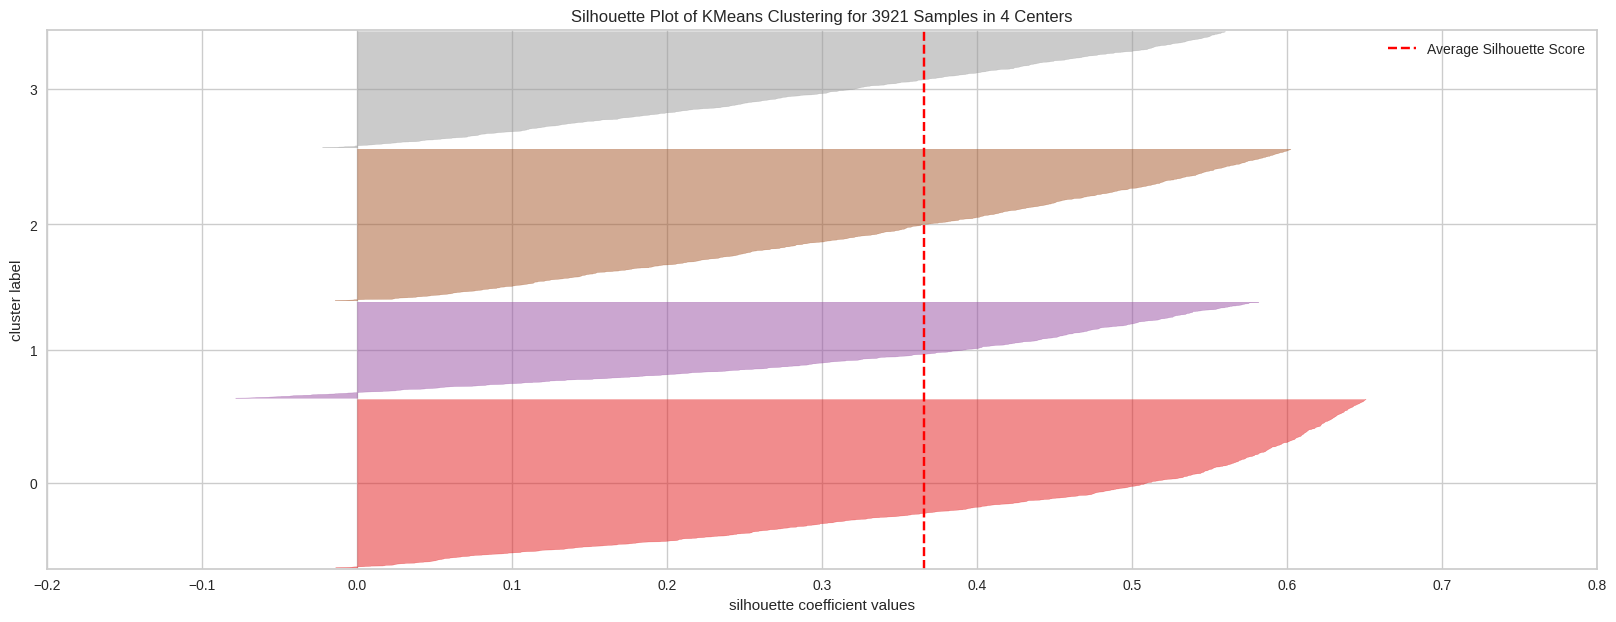

For n_clusters = 5, silhouette score is 0.3328555967428397


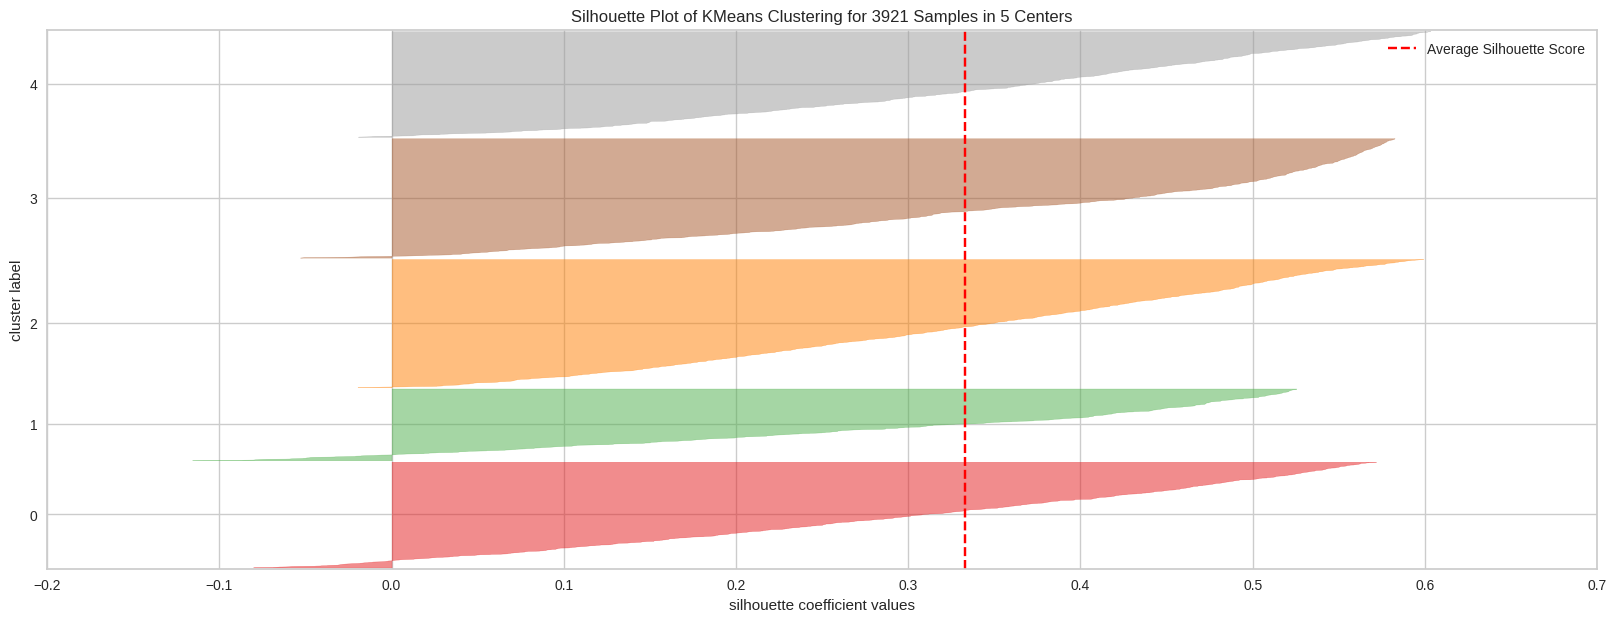

For n_clusters = 6, silhouette score is 0.3408979097657962


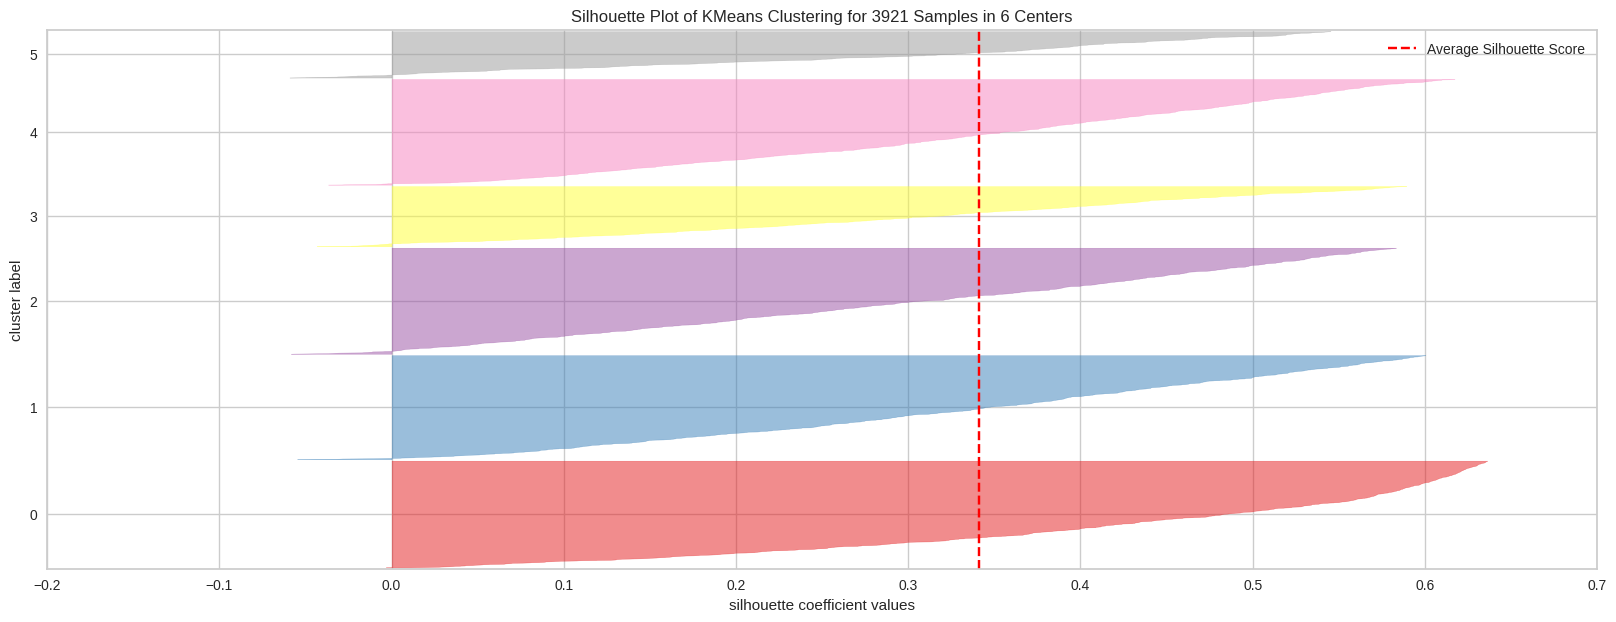

In [50]:
# run the silhouette analysis
silhouette_analysis(7)

As we can see from the above Silhouette score plot that the **Silhouette score** increased to 0.365693 up till **n_clusters = 4** and after that it again started decreasing.

Based on the Silhouette score plot, we can conclude that the optimal number of clusters for this dataset is 4. This is because the Silhouette score is highest at 4 clusters, indicating that the clusters are well separated and that the data points within each cluster are similar to each other.


**Implementing Elbow Method to find optimal number of clusters for K-means**

The **elbow method** is used to determine the optimal number of clusters for a K-means clustering algorithm. It works by plotting the sum of squared distances between the data points and their assigned cluster centroids against the number of clusters, and identifying the "elbow" point where the improvement in clustering performance becomes less significant

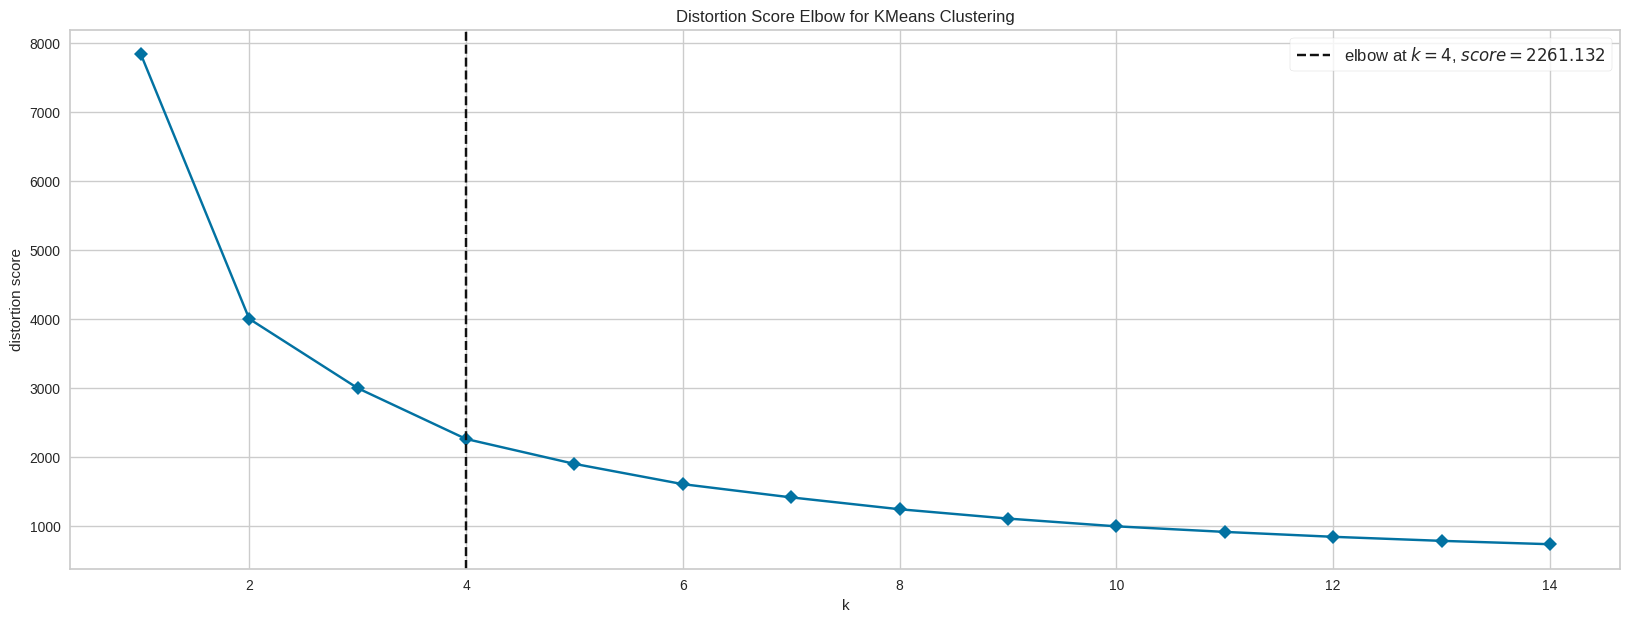

In [51]:
# applying elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(2,15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.poof()
plt.show()

The bend in the above Elbow Method plot at n_clusters = 4 indicates that the addition of more clusters beyond 4 is unlikely to improve the performance of the K-means algorithm significantly. This suggests that 4 clusters may be the optimal number for this dataset.

**Implementing K-means Model**

Both the Silhouette score Method & Elbow method are suggesting us that the optimal number of cluster are 4 for our given dataset

Now let's Build a KMeans model with n_clusters = 4

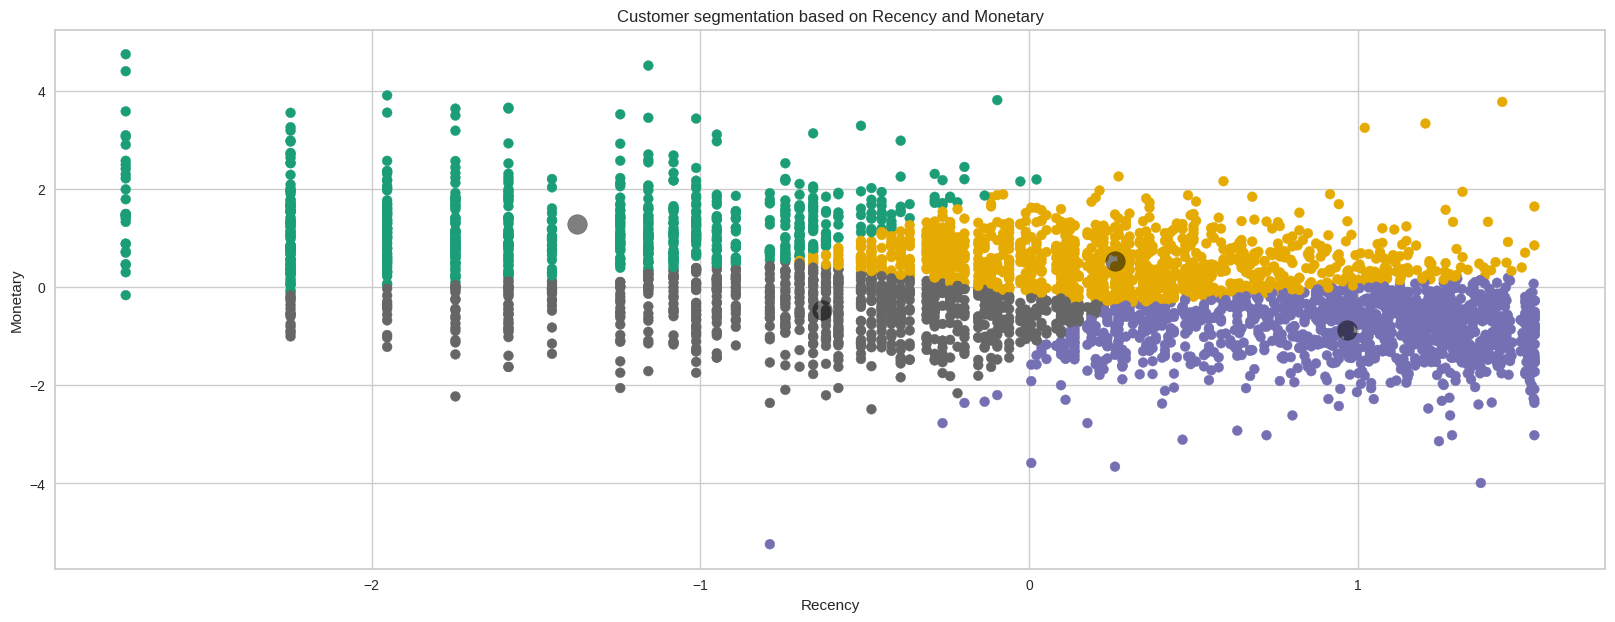

In [52]:
# Implementing KMeans with number of clusters as 4 
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_km = kmeans.predict(X)

# plot the clusters
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Dark2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

We can observe four clusters from the KMeans model applied on Recency and Monetary data:


*   High Valued Customers (Grey Points): These customers haven't puchased recently but have contributed more monetarily.
*  Moderate Valued Customers (Yellow Points): These customers are not the very recent or least recent and has contributed moderately in terms of money.

*   Casual Customers (Green Points): These customers haven't puchased recently and have contributed very less monetarily.
*  New Customers (Blue Points): These customers are the most recent and with very less contribution monetarily.

## **Implementing Hierarchical Clustering**

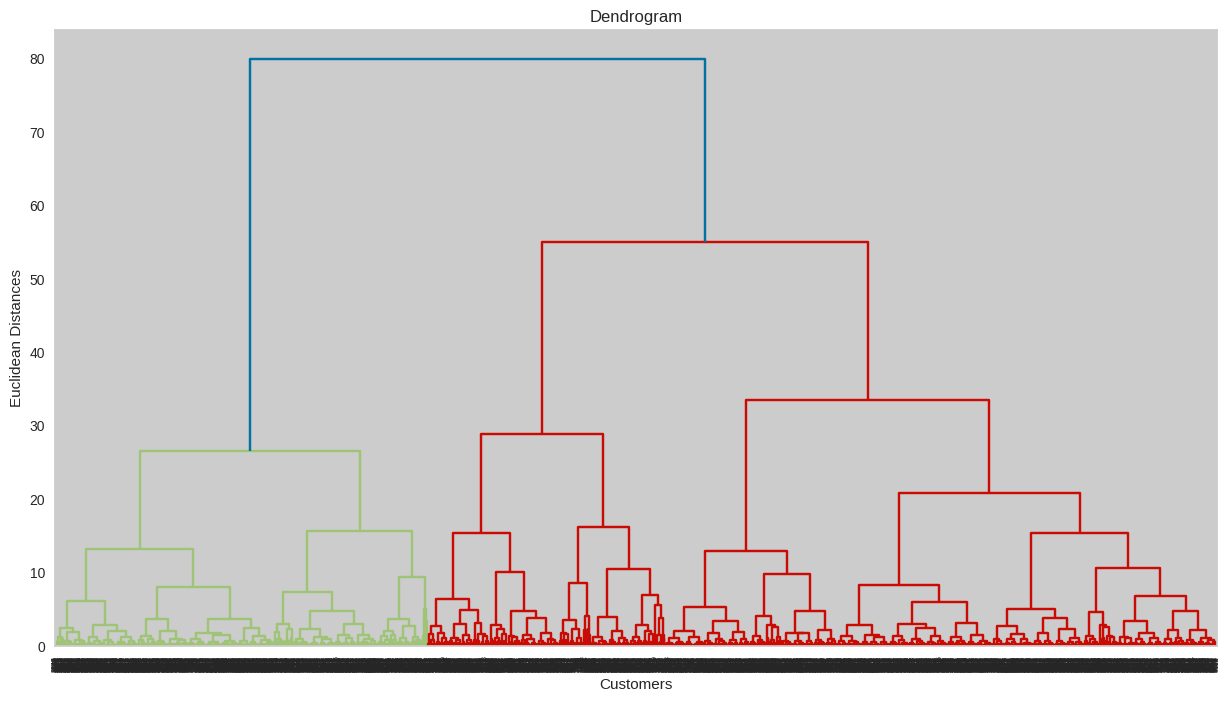

In [53]:
# Using the dendogram to find the optimal number of clusters
plt.rcParams['figure.figsize']=(15,8)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

*   The largest vertical distance we can find to draw a horizontal line to interesect is around 90.
*   The number of clusters formed will be the number of vertical lines interesected by the horizontal line drawn using the threshold 90.
*  Thus the optimal number of cluster will be 2.

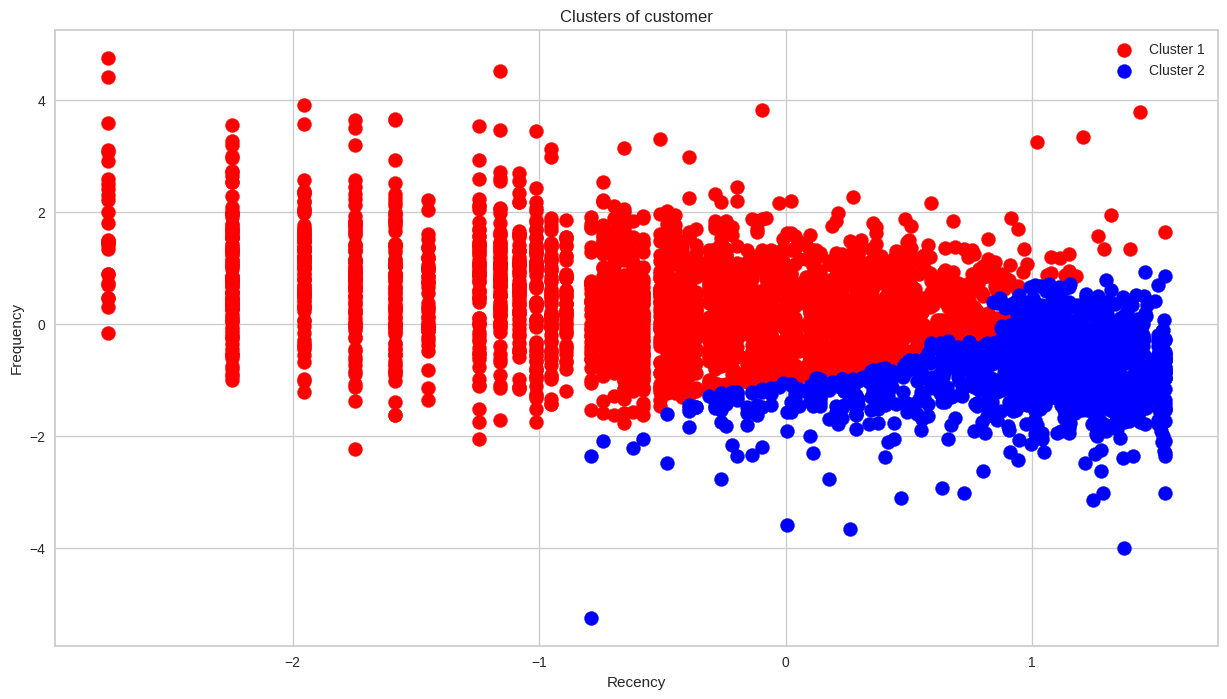

In [54]:
# fit hierarchical clustering to the data
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# plot the clusters
plt.scatter(X[y_hc == 0,0], X[y_hc == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1,0], X[y_hc == 1,1], s=100, c='blue', label='Cluster 2')
plt.title('Clusters of customer')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **Conclusion**

1. From the results of the Exploratory Data Analysis, we can draw several conclusions and gain insights. Firstly, we found that out of a total of 8872 cancelled transactions, the United Kingdom had the highest number of cancellations among all the countries analyzed. 

2. Secondly, the World War II Glider Asstd Design product was the most frequently purchased and therefore the most popular among all products sold. Lastly, the United Kingdom had the highest number of unique customers, with a total of 3950 unique customers.

3. Moving on to implementing a Machine Learning model, we used the Recency, Frequency, Monetary (RFM) method for segmenting our data. This method identifies customers based on the recency of their last purchase, the total number of purchases they have made, and the amount they have spent. 

4. After analyzing the RFM scores, we implemented the K-Means clustering algorithm to identify different customer segments. We used the silhouette score method and the elbow method to determine the optimal number of clusters, which was found to be 4. Overall, these results provide valuable insights into customer segmentation and can be used to improve marketing and sales strategies.